In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Nihar Ranjan
[nltk_data]     Murudi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Nihar Ranjan
[nltk_data]     Murudi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv(r'C:\Users\Nihar Ranjan Murudi\OneDrive\Desktop\Fake Review\fake_reviews_dataset.csv')
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

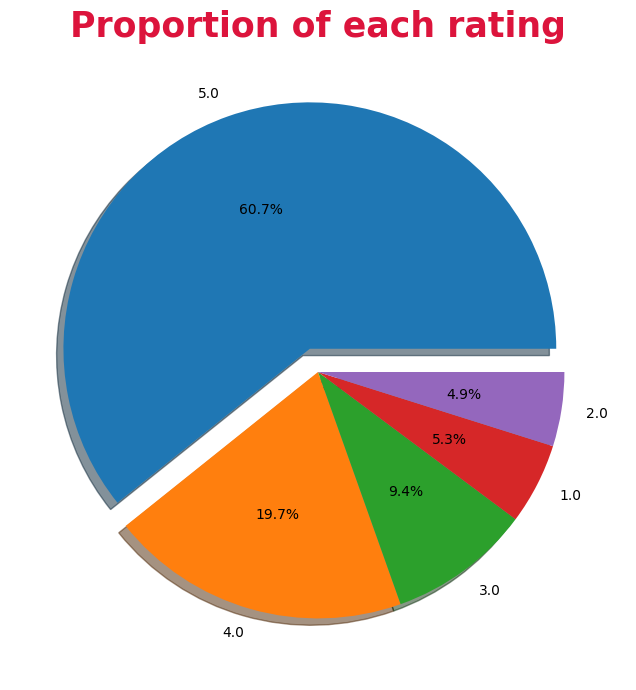

In [8]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [9]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nihar Ranjan
[nltk_data]     Murudi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [12]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [13]:
df.shape

(40432, 4)

In [14]:
df['text_'] = df['text_'].astype(str)

In [15]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nihar Ranjan
[nltk_data]     Murudi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [18]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [19]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [20]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [21]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [22]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [23]:
df['text_'] = df['text_'].str.lower()

In [24]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [25]:
df['text_'].head()

0    love well made sturdy comfortable i love very ...
1    love great upgrade original i 've mine couple ...
2       this pillow saved back i love look feel pillow
3        missing information use great product price i
4          very nice set good quality we set two month
Name: text_, dtype: object

In [26]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [27]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable i love very ...
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original i 've mine couple ...
2,Home_and_Kitchen_5,5.0,CG,this pillow saved back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price i
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we set two month
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i read review saying bra ran small i ordered t...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i n't sure exactly would it little large small...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,you wear hood wear hood wear jacket without ho...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i liked nothing dress the reason i gave star i...


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [29]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable i love very ...
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrade original i 've mine couple ...
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,missing information use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we set two month


In [30]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable i love very ...
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original i 've mine couple ...
2,Home_and_Kitchen_5,5.0,CG,this pillow saved back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price i
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we set two month


In [32]:
df.dropna(inplace=True)

In [33]:
df['length'] = df['text_'].apply(len)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


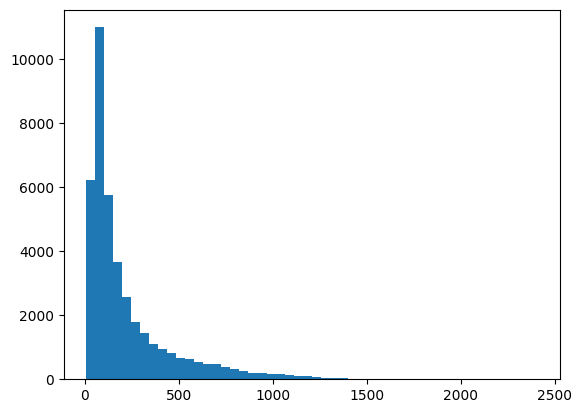

In [35]:
plt.hist(df['length'],bins=50)
plt.show()

In [36]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     186.391096  187.124908  15.0  61.0  107.0  232.0  1326.0  
OR     260.146171  277.564781   8.0  80.0  146.0  324.0  2405.0

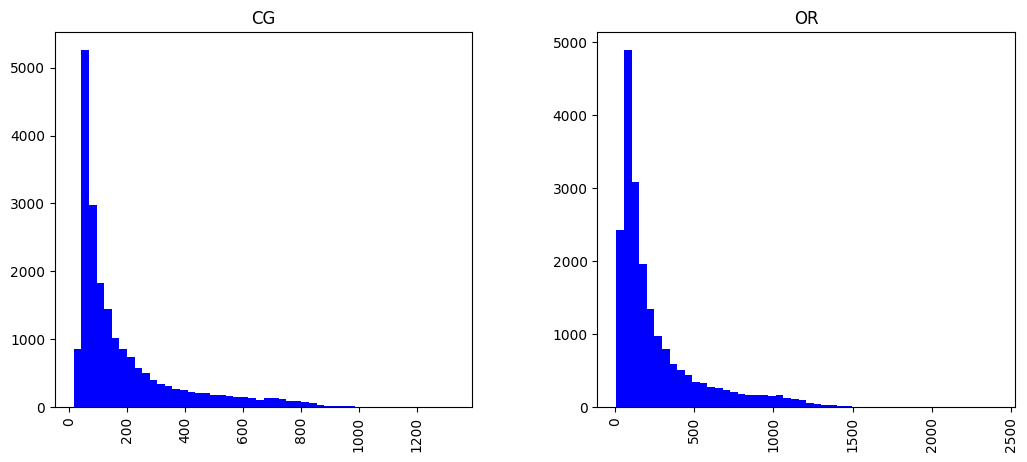

In [37]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [38]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current science after seeing twice i agree much positive five star review out respect read review i 'll repeat everything i like presentation i found goofy oversize earring hairdo facial hair arrangement daniel vitalis described `` wild food expert '' distracting ugh ditto david wolfe extremely goofy wild hairdo on hand jon gabriel described `` author weight loss expert '' nicely groomed good presenter his story personal transformation fellow pound whew becoming jock normal weight inspiring christiane northrup preserve rank one america 's cutest doctor a really nice looking woman presentation dr. mercola jason vale kris carr alejandro junger fine it disappointing jamie oliver popular uk give baby cow growth fluid pas unscientific popular idea milk none presenter anything zilch say work doctor t. colin campbell milk body bad it good see presenter take stand sugar they agreed evil sugar refined carbohydrate with respect dr. northrup `` it 's fat make fat 's sugar '' statement pa

In [39]:
df.length.describe()

count    40431.000000
mean       223.269546
std        239.558114
min          8.000000
25%         69.000000
50%        125.000000
75%        274.000000
max       2405.000000
Name: length, dtype: float64

In [40]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [41]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000241F9CB7920>)

In [42]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 42783


In [43]:
review4 = df['text_'][3]
review4

'missing information use great product price i'

In [44]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 16958)	1
  (0, 19702)	1
  (0, 24580)	1
  (0, 29428)	1
  (0, 29586)	1
  (0, 40168)	1
(1, 42783)


In [45]:
index_to_word = {index: word for word, index in bow_transformer.vocabulary_.items()}
print(index_to_word[15841])
print(index_to_word[23848])

ful
meanspiritedness


In [46]:
bow_reviews = bow_transformer.transform(df['text_'])

In [47]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 42783)
Amount of non zero values in the bag of words model: 1020945


In [48]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.06


In [49]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 16958)	1
  (0, 19702)	1
  (0, 24580)	1
  (0, 29428)	1
  (0, 29586)	1
  (0, 40168)	1


In [50]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821837302066699


In [51]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 42783)
No. of Dimensions: 2


In [52]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [53]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [54]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000241F9CB7920>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [55]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype='<U2')

In [56]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.90      0.86      7070
          OR       0.89      0.80      0.84      7081

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6381  689]
 [1426 5655]]
Accuracy Score: 0.8505405978376086


In [57]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 85.05%


In [58]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [59]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000241F9CB7920>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [60]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [61]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.85      7070
          OR       0.87      0.80      0.83      7081

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6232  838]
 [1427 5654]]
Accuracy Score: 0.8399406402374391
Model Prediction Accuracy: 83.99%


In [62]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [63]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000241F9CB7920>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [64]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [65]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.74      0.75      0.75      7070
          OR       0.75      0.74      0.74      7081

    accuracy                           0.75     14151
   macro avg       0.75      0.75      0.75     14151
weighted avg       0.75      0.75      0.75     14151

Confusion Matrix: [[5321 1749]
 [1847 5234]]
Accuracy Score: 0.7458836831319341
Model Prediction Accuracy: 74.59%


In [66]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [67]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000241F9CB7920>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [68]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [69]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.98      0.69      7070
          OR       0.87      0.17      0.28      7081

    accuracy                           0.57     14151
   macro avg       0.71      0.57      0.49     14151
weighted avg       0.71      0.57      0.49     14151

Confusion Matrix: [[6895  175]
 [5883 1198]]
Accuracy Score: 0.5719030457211505
Model Prediction Accuracy: 57.19%


In [70]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [71]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000241F9CB7920>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [72]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [73]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.86      0.88      7070
          OR       0.87      0.90      0.89      7081

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6110  960]
 [ 698 6383]]
Accuracy Score: 0.8828351353261253
Model Prediction Accuracy: 88.28%


In [74]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [75]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000241F9CB7920>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [76]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [77]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.85      0.86      7070
          OR       0.85      0.88      0.87      7081

    accuracy                           0.87     14151
   macro avg       0.87      0.87      0.87     14151
weighted avg       0.87      0.87      0.87     14151

Confusion Matrix: [[6004 1066]
 [ 819 6262]]
Accuracy Score: 0.8667938661578687
Model Prediction Accuracy: 86.68%


In [78]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.68%
K Nearest Neighbors Prediction Accuracy: 57.19%
Decision Tree Classifier Prediction Accuracy: 74.59%
Random Forests Classifier Prediction Accuracy: 83.99%
Support Vector Machines Prediction Accuracy: 88.28%
Multinomial Naive Bayes Prediction Accuracy: 85.05%


In [80]:
# SVM Pipeline setup
svm_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Converts text to a matrix of token counts
    ('tfidf', TfidfTransformer()),                    # Apply TF-IDF
    ('classifier', SVC())                             # Apply Support Vector Machine
])

# Training the SVM pipeline
svm_pipeline.fit(review_train, label_train)



The review is predicted as: Computer-generated


In [87]:
# Function to classify a user-input review using the trained SVM pipeline
def classify_review():
    """
    Prompts the user to enter a review and classifies it as 'Original' or 'Computer-generated'.
    """
    new_review = input("Enter your review: ")  # User inputs the review
    prediction = svm_pipeline.predict([new_review])[0]  # Prediction using the SVM model
    return f"The review is predicted as: {'Original' if prediction == 'OR' else 'Computer-generated'}"

# Running the function to classify user-input review
if __name__ == "__main__":
    print(classify_review())

The review is predicted as: Computer-generated
